In [2]:
import matplotlib.pyplot as plt
import os

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

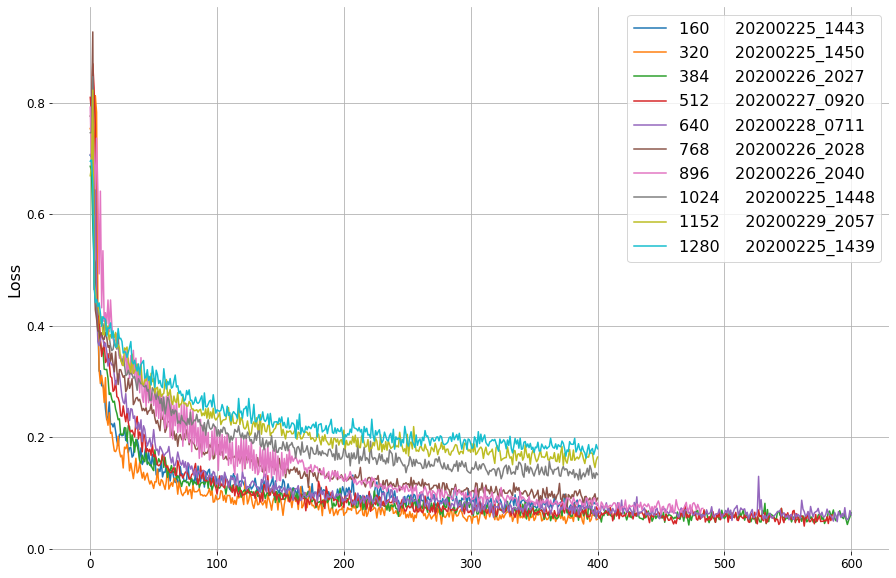

In [6]:
root_work_dir = './Work_dirs/work_dirs_external/'

#img_type = 'rgb'

#time_stamps = ['20200215_1046', '20200215_0518','20200216_1938', '20200214_1620','20200214_2057', '20200214_1621']
#lrs = ['0.001','0.0005' ,' 0.0001', '0.00005', '0.00003','0.00001' ]

#img_type = 'infrared'
#time_stamps = ['20200215_1058','20200216_2009', '20200216_1933', '20200216_1956','20200216_1936', '20200216_1932','20200215_1059']
#lrs = ['0.0005','0.00025', '0.0001', '7.5e-05', '5e-05' , '1e-05','5e-06']
#img_type = 'infrared'
#time_stamps = ['20200221_1432','20200221_1758', '20200218_1929']
#lrs = ['new_loss', 'new_loss freeze 2', 'old_loss']

img_type = 'rgb'
time_stamps = ['20200225_1443',
               '20200225_1450',
               '20200226_2027',
               '20200227_0920',
               '20200228_0711',
               '20200226_2028',
               '20200226_2040',
               '20200225_1448',
               '20200229_2057',
               '20200225_1439']
lrs = ['160',
       '320',
       '384',
       '512',
       '640',
       '768',
       '896',
       '1024',
       '1152',
       '1280']#, 'baseline1280']


#img_type = 'ensemble'
#time_stamps = ['20200217_2021', '20200217_2312', '20200217_2351','20200217_1624','20200217_2055','20200217_1747']
#lrs = ['0.0005', '0.0001','0.000075','0.00005','0.00001','0.000005']
#time_stamps = [ '20200219_1221','20200224_0830']
#lrs = ['old','new' ]


        
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
        
    with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
        VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    
    ax.plot( train_loss, label= lrs[i] + '     ' + time_stamp)
    #ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
#plt.ylim((0.1,0.5))
ax.grid()

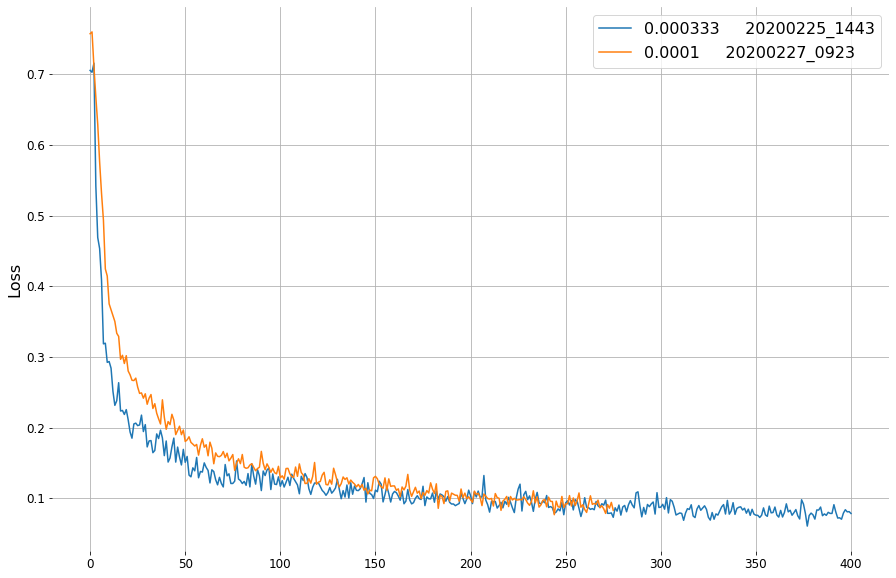

In [7]:
root_work_dir = './Work_dirs/work_dirs_external/'

img_type = 'rgb'
time_stamps = ['20200225_1443','20200227_0923']#,'20200222_0826'] #]#
lrs = ['0.000333','0.0001']#, 'baseline1280']
     
        
fig, ax = plt.subplots(figsize=(15,10))

i = 0

for time_stamp in time_stamps:
    work_dir = root_work_dir+ img_type +'/' + time_stamp
    
    with open( os.path.join(work_dir, 'TRAIN_LOSS.txt' ), 'r') as f:
        train_loss = list(map(float,  f.readlines()[0].split() )) 
        
    with open( os.path.join(work_dir, 'VALIDATION_LOSS.txt' ), 'r') as f:
        VAL_loss = list(map(float,  f.readlines()[0].split() )) 

    
    ax.plot( train_loss, label= lrs[i] + '     ' + time_stamp)
    #ax.plot( VAL_loss, label='VALIDATION ' + lrs[i] + ' ' + time_stamp)
    
    i = i+1
    


    
plt.yticks( fontsize=12)
plt.xticks( fontsize=12)
ax.legend(fontsize=16)
plt.ylabel('Loss', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.yaxis.grid()
#plt.ylim((0.1,0.5))
ax.grid()